In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",50)
plt.rcParams["figure.figsize"]=[10,8]

%matplotlib inline

In [105]:
#pip install seaborn

## Problem Statement:

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

## Data Setup:

In [106]:

train=pd.read_csv(r"C:\Users\bagya\Downloads\titanic\train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: ylabel='Fare'>

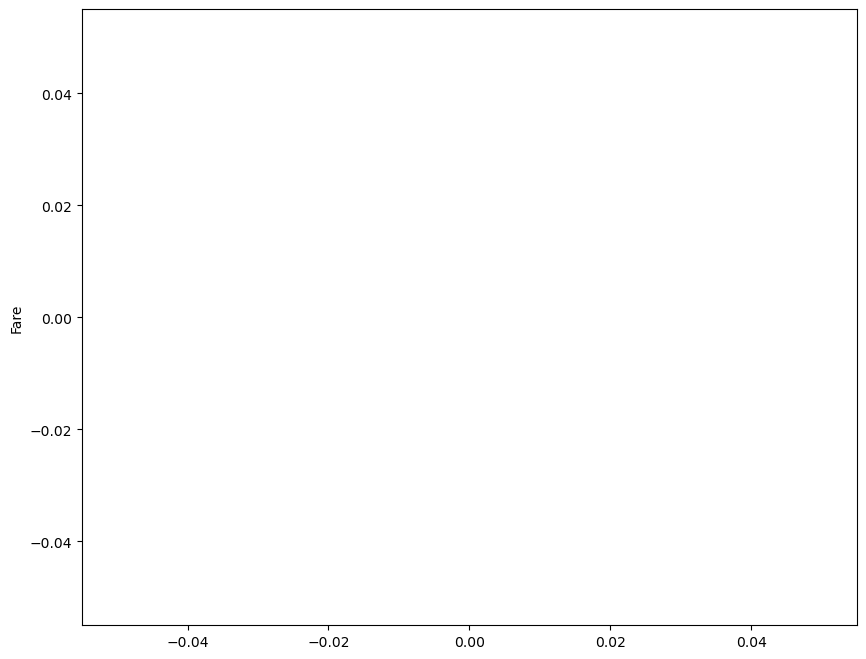

In [107]:
sns.scatterplot(train['Age'],y=train['Fare'])

In [108]:
test=pd.read_csv(r"C:\Users\bagya\Downloads\titanic\test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [109]:
df_ti_gen_sub=pd.read_csv(r"C:\Users\bagya\Downloads\titanic\gender_submission.csv")
df_ti_gen_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Shape of train and test data:

In [110]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


# Exploratory Data Analysis:

## 1. Univariate Analysis:

## Age column:

In [111]:
df_titanic=pd.concat([train,test],ignore_index=True)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### Before treating missing values checking the distribution of the data:

<Axes: >

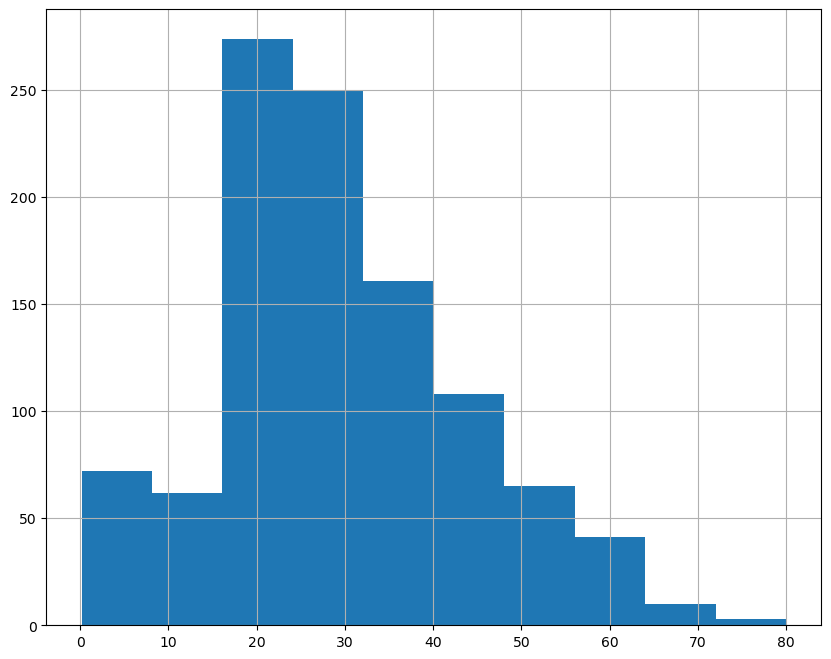

In [113]:
df_titanic["Age"].hist()

### Analysis:

* There is a lot of amount of skewness.
* The most likely to survive range between 70-80.
* The less survive people range from 0-10.

#### After binning:

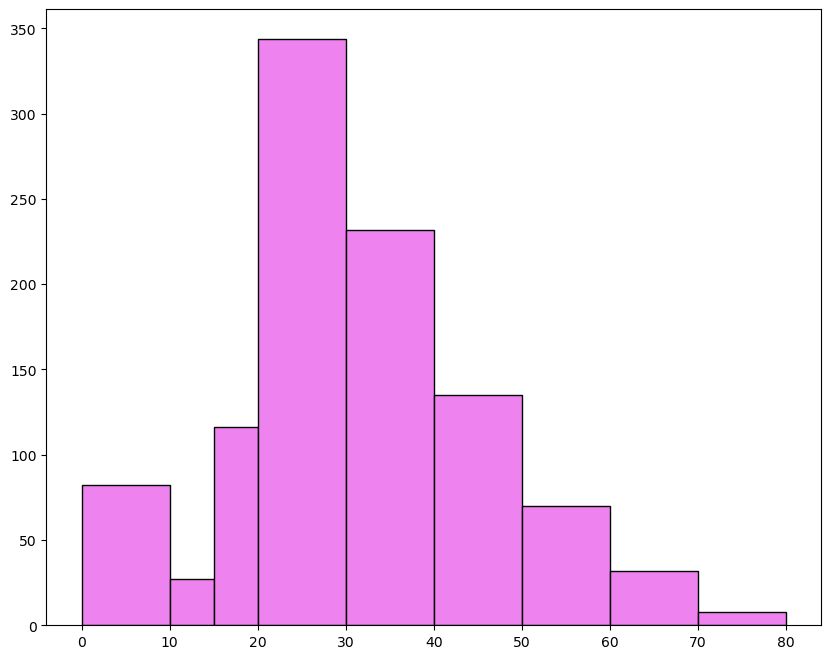

In [114]:
plt.hist(x="Age",data=df_titanic,bins=[0,10,15,20,30,40,50,60,70,80],color="violet",edgecolor="black")
plt.show()

#### Analysis:

* From 0-10 there are approximately 80 people who are about to survive.
* From 20-20,30-40 there are approximately ranges 250-350 who won't survive.
* From 70-80 there are approximately 10 people who will survive.

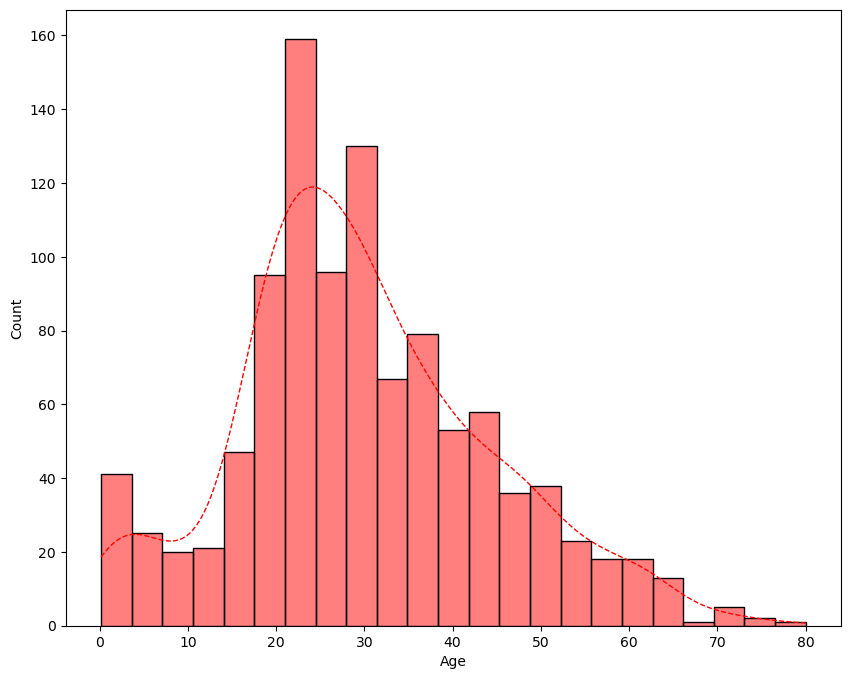

In [115]:
sns.histplot(x='Age',data=df_titanic,color='red',edgecolor='black',kde=True,line_kws={'lw': 1,'linestyle':'--'})
plt.show()

The data is skewed to the right.

### Displaying mean,median and mode:

In [116]:
me=df_titanic["Age"].mean()
md=df_titanic["Age"].median()
mo=df_titanic["Age"].mode()[0]

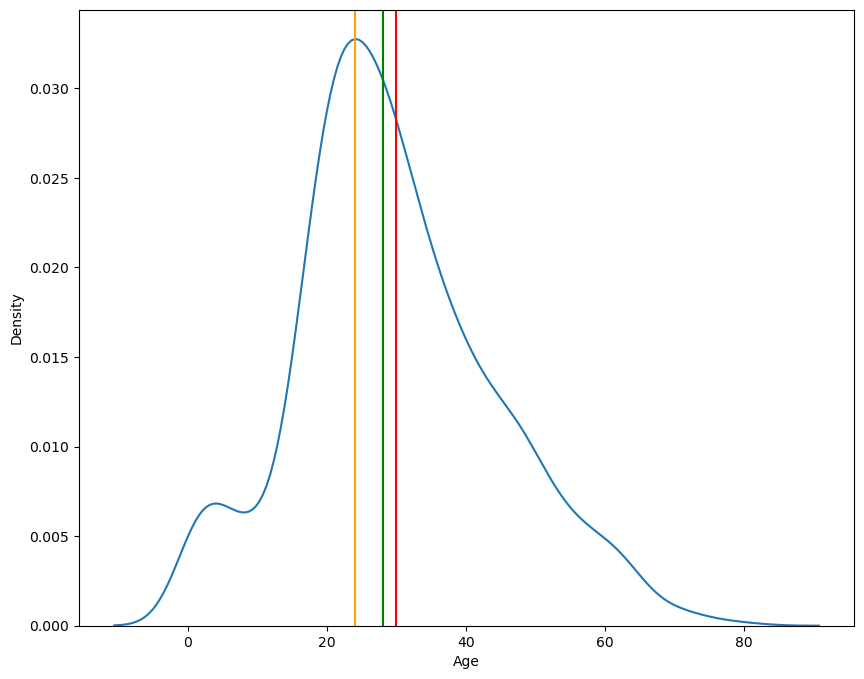

In [117]:
sns.kdeplot(df_titanic["Age"])
plt.axvline(me,label="Mean",color="red")
plt.axvline(md,label="Median",color="green")
plt.axvline(mo,label="Mode",color="orange")

## Checking the data descriptions:

In [118]:
print("Skewness is ",df_titanic["Age"].skew())
print("Kurtosis is ",df_titanic["Age"].kurtosis())

Skewness is  0.40767455974362266
Kurtosis is  0.1469476357378139


In [119]:
df_titanic["Age"].describe() # To find any anomynous in our data

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

### Inference:

* The average age of the data is around 30.
* 25 % of people are from  age of 21 .
* 50 % of the people are below 28 years of Age.
* There are elderly people of the Age 80.


## Fare column:

<Axes: >

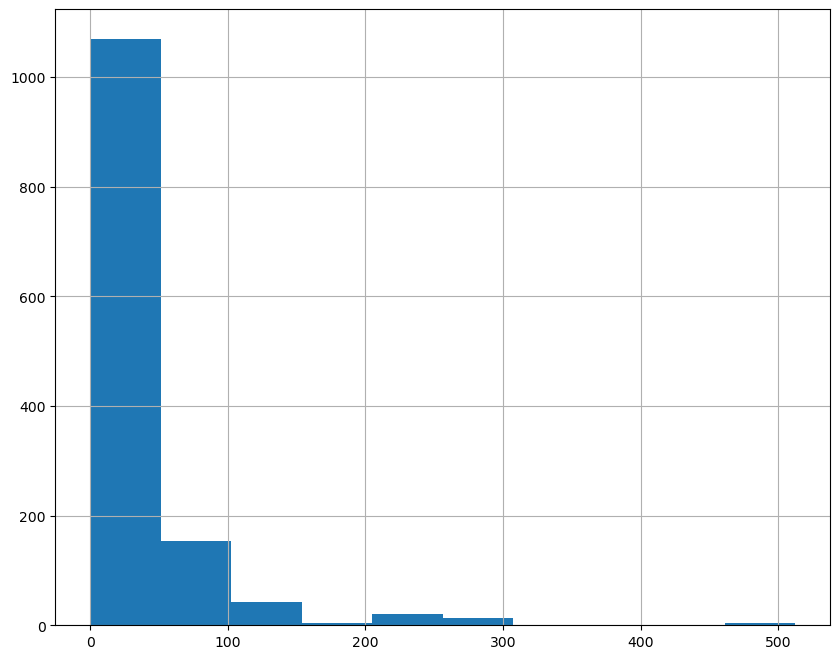

In [120]:
df_titanic["Fare"].hist()

### Analysis:

* As most of the fare price ranges from 0-100.
* And a very slight amount of rise of fare in 200-300 and  500.

#### After Binning:

<Axes: >

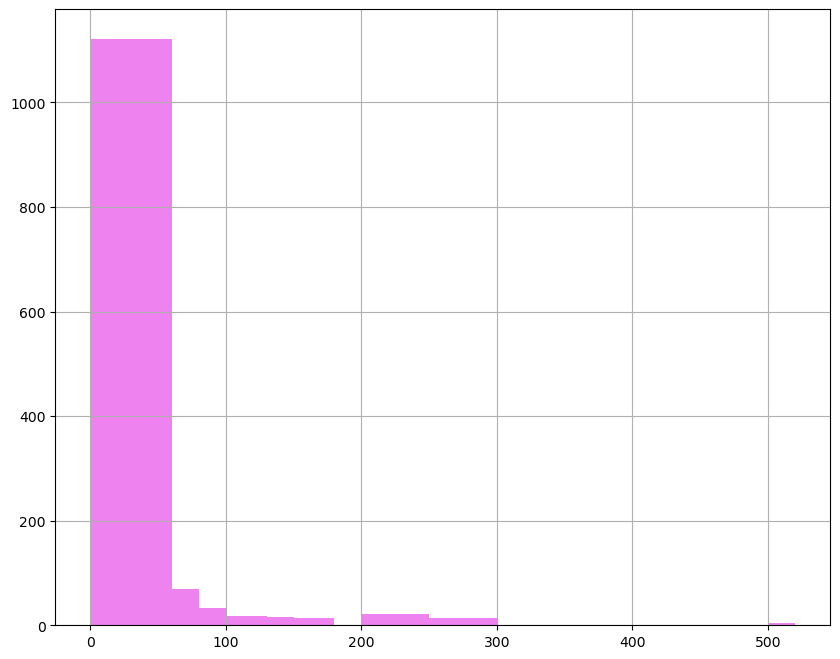

In [121]:
df_titanic['Fare'].hist(bins=[0,60,80,100,130,150,180,200,250,300,400,480,500,520],color='violet')

#### Analysis:

* Around 1300 people are paying around 80 pounds.
* And it is very least number of people are paying more than 500 pounds.

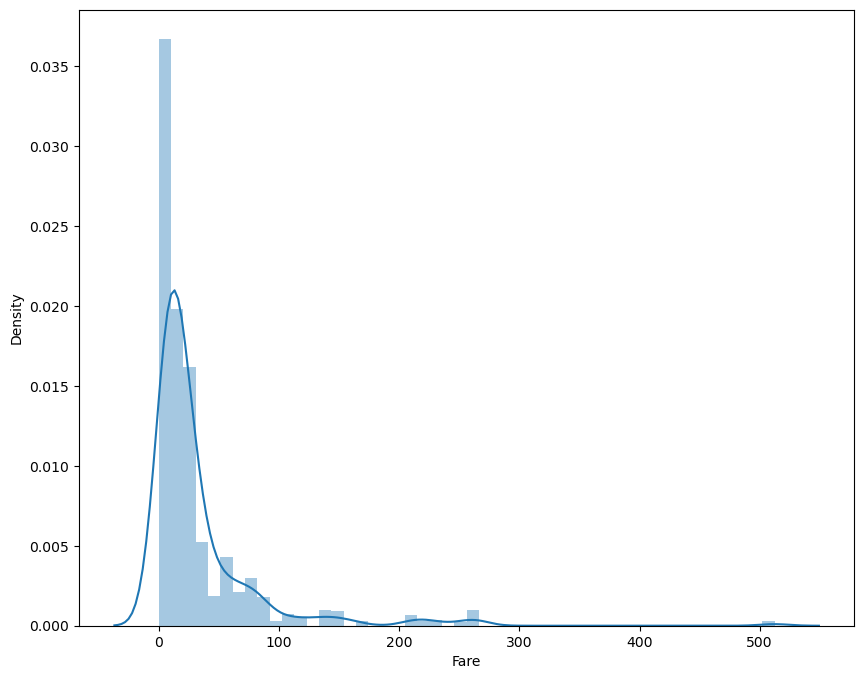

In [122]:
sns.distplot(df_titanic["Fare"])
plt.show()

* Fare is hihgly skewed.

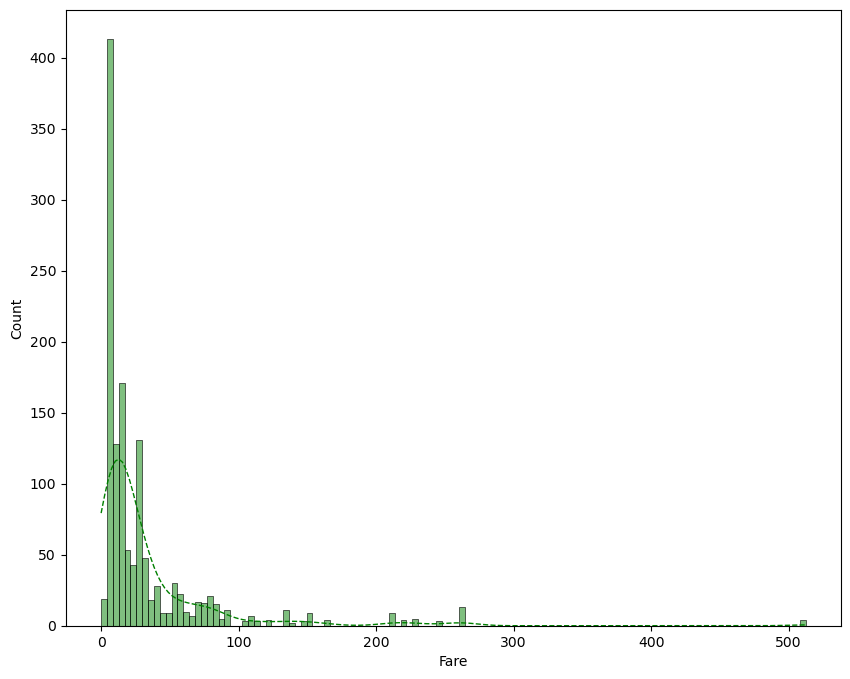

In [123]:
sns.histplot(x='Fare',data=df_titanic,color='green',edgecolor='black',kde=True,line_kws={'lw': 1,'linestyle':'--'})
plt.show()

### Displaying mean, median and mode in fare:

In [124]:
me=df_titanic["Fare"].mean()
md=df_titanic["Fare"].median()
mo=df_titanic["Fare"].mode()[0]

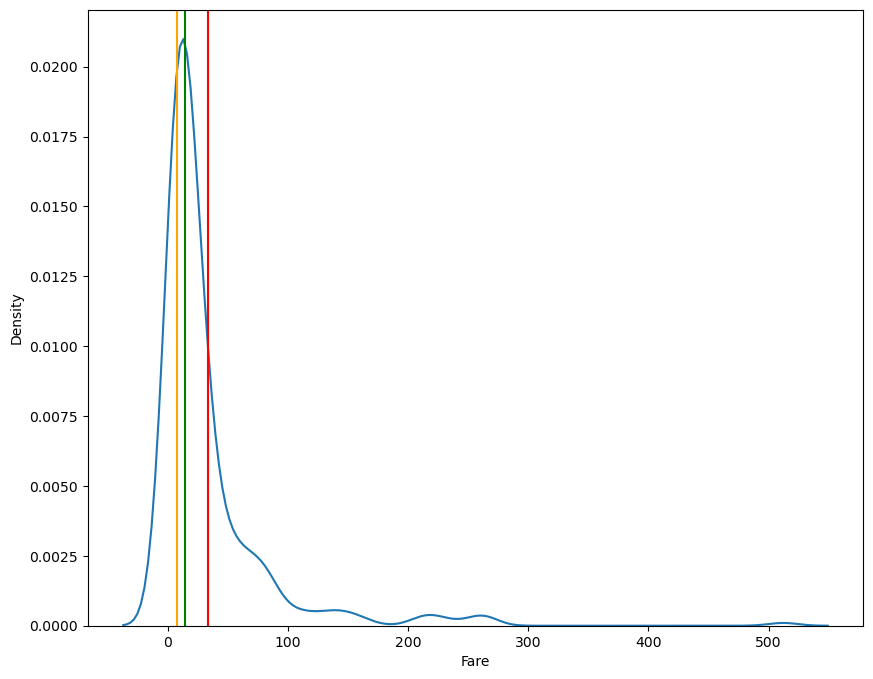

In [125]:
sns.kdeplot(df_titanic["Fare"])
plt.axvline(me,label="Mean",color="red")
plt.axvline(md,label="Median",color="green")
plt.axvline(mo,label="Mode",color="orange")

### Checking data description:

In [126]:
print("Skewness is ",df_titanic["Fare"].skew())
print("Kurtosis is ",df_titanic["Fare"].kurtosis())

Skewness is  4.367709134122922
Kurtosis is  27.027986349442294


### Cummulative plot and its relevance:

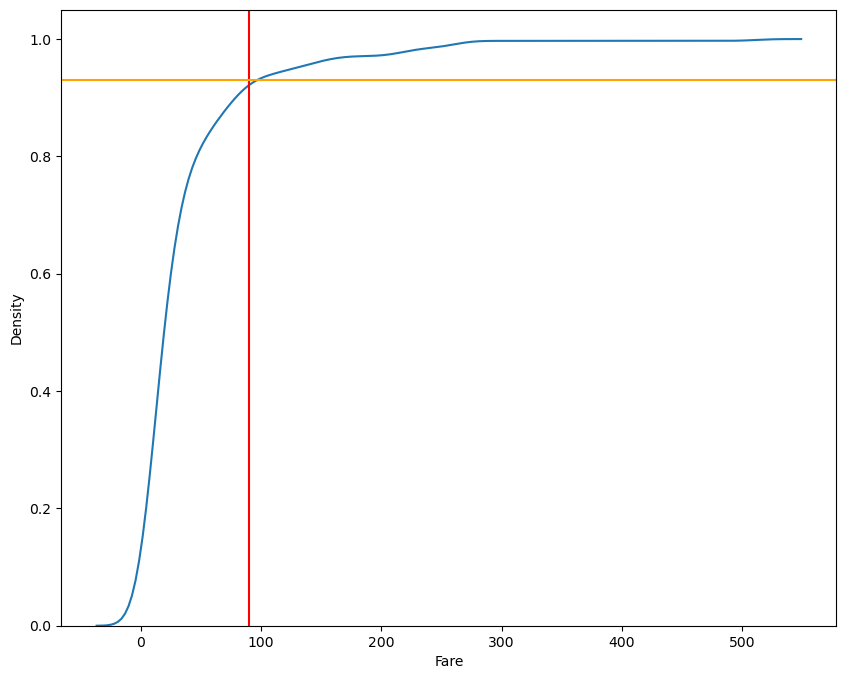

In [127]:
sns.kdeplot(x="Fare",data=df_titanic,cumulative=True)
plt.axvline(90,color="red")
plt.axhline(0.93,color="orange")
plt.show()

#### Analysis:

* There is a 93% of chance of people are paying a fare less than 90 pounds.
* That means 7 % of people who are paying greater than 90 pounds.


In [128]:
df_titanic["Fare"].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

#### Inference:

* Fare are highly skewed.
* 50 % of the fare are above 14.
* As min fare is showing 0 it might be for crew members or babies.
* As th average fare amount is around 33 pound.

In [129]:
df_titanic["Fare"][df_titanic["Fare"]==0].count()

17

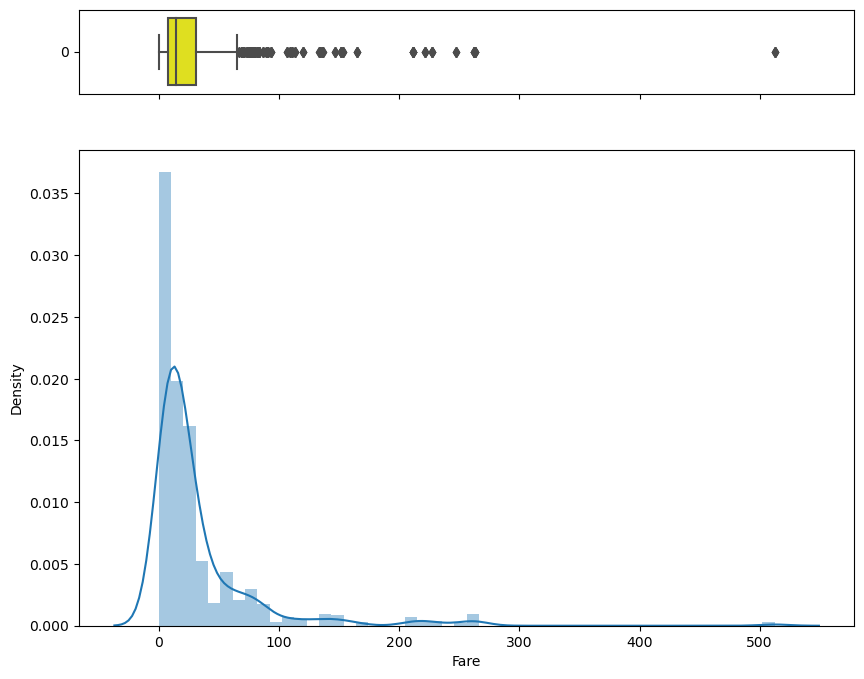

In [130]:
area, (first_box, second_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_titanic['Fare'], ax=first_box, orient='h',color='yellow')
sns.distplot(df_titanic['Fare'], ax=second_hist)
plt.show()

### Checking on numerical dataset:

In [131]:
num_cols=df_titanic.select_dtypes(include=np.number)
num_cols.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [132]:
num_cols=num_cols[["Age","Fare"]] # Other columns are categorical in nature.

In [133]:
plt.rcParams["figure.figsize"]=5,5

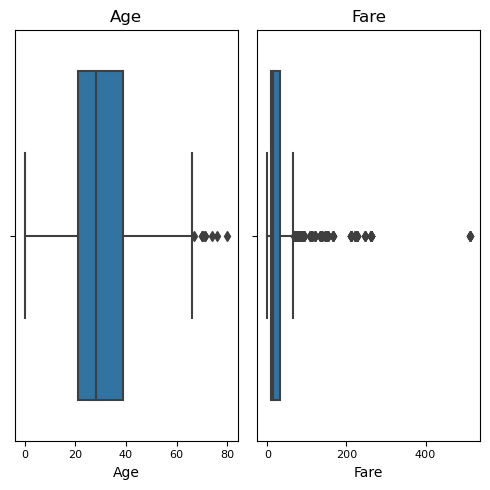

In [134]:
j=1
for i in num_cols:
    plt.subplot(1,2,j)
    sns.boxplot(x=df_titanic.loc[:,i])
    plt.title(i)
    j=j+1
    
    plt.xticks(rotation=360,fontsize=8)
plt.tight_layout()
plt.show()
    

### Analysis:

* There are outliers in both columns.
* There might be a chance of as both the data is related.

### On categorical columns:

In [135]:
cols=["Embarked","Survived","Sex"]

In [136]:
for i in cols:
    df_titanic[i]=df_titanic[i].astype(object)

In [137]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    object 
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


###  Doing countplots and analysing:

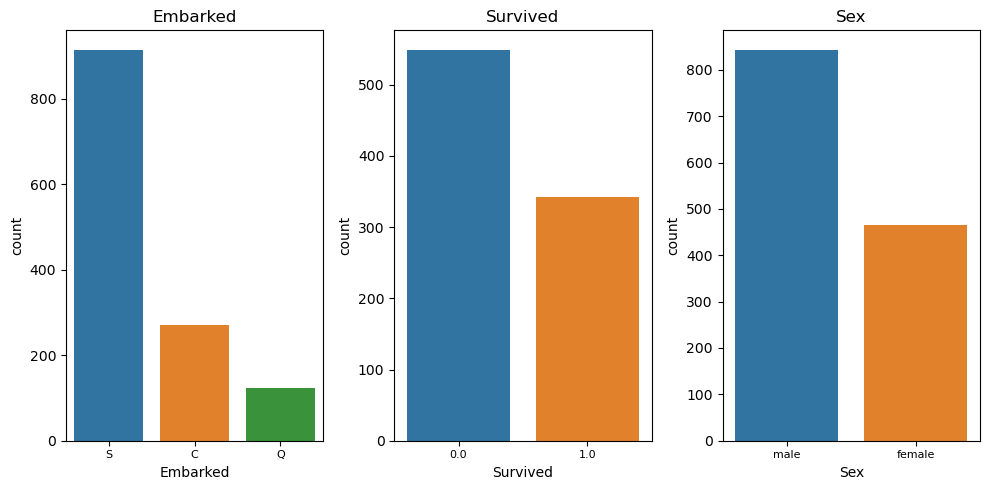

In [138]:
plt.rcParams["figure.figsize"]=10,5

j=1
for i in cols:
    plt.subplot(1,3,j)
    sns.countplot(x=df_titanic.loc[:,i])
    plt.title(i)
    j=j+1
    
    plt.xticks(rotation=360,fontsize=8)
plt.tight_layout()
plt.show()

### Analysis:

* The ship that started from Southemptown have high number of people boarded.
* Less number of people from Queenstown.
* As male are higher there might be a chance they are not survived.
* Most of the passesngers were from third class.

# 2. Bivariate analysis:

### a. Age Vs Fare

In [139]:
num_cols=["Age","Fare"]

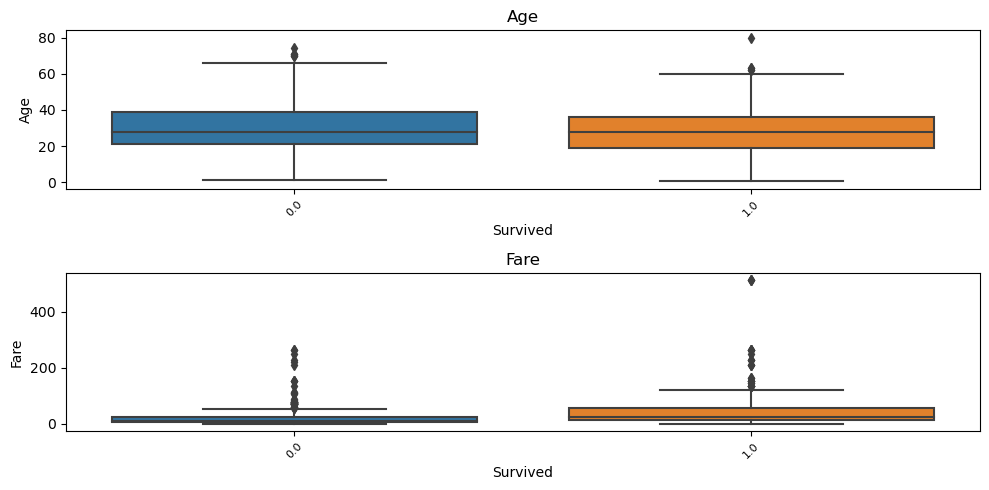

In [140]:
plt.rcParams['figure.figsize']=10,5
j=1
for i in num_cols:
    plt.subplot(2,1,j)
    sns.boxplot(x=df_titanic['Survived'],y=df_titanic.loc[:,i])
    plt.title(i)
    j=j+1
    plt.xticks(rotation =45,fontsize=8)
plt.tight_layout()
plt.show()

### Analysis:

* The person who are paid high fare they survived.
* Might be the person who paid 512 pounds may be around age of 80.
* There is strong relation between age and survive.

### Doing Mulitvariate Analysis:

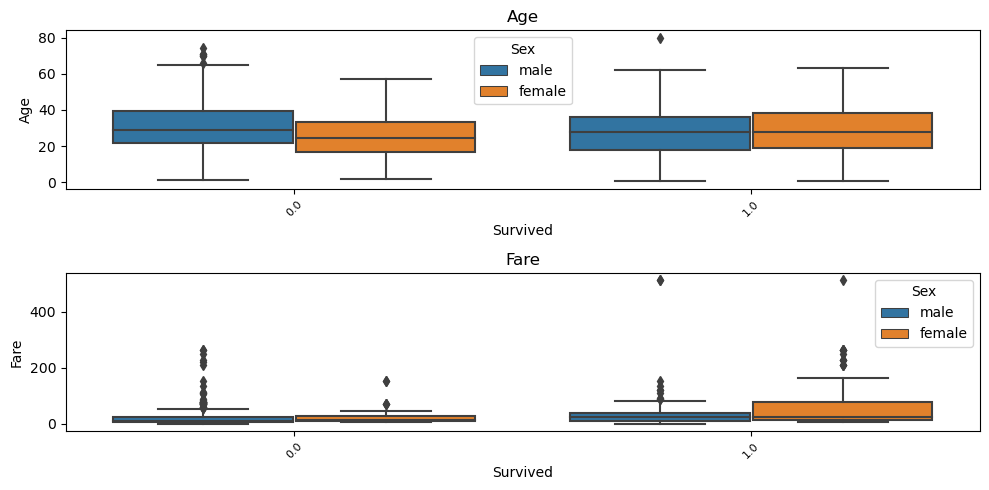

In [141]:
plt.rcParams['figure.figsize']=10,5
j=1
for i in num_cols:
    plt.subplot(2,1,j)
    sns.boxplot(x=df_titanic['Survived'],y=df_titanic.loc[:,i],hue=df_titanic["Sex"])
    plt.title(i)
    j=j+1
    plt.xticks(rotation =45,fontsize=8)
plt.tight_layout()
plt.show()

#### Analysis:

* The person who paid high amount at the age of 80 is male who is survived.
* Females are paying more compared to male.
* Fare is playing a major role in survival method along with the age.
* Younger people survived compared to older people.

#### Alter method:

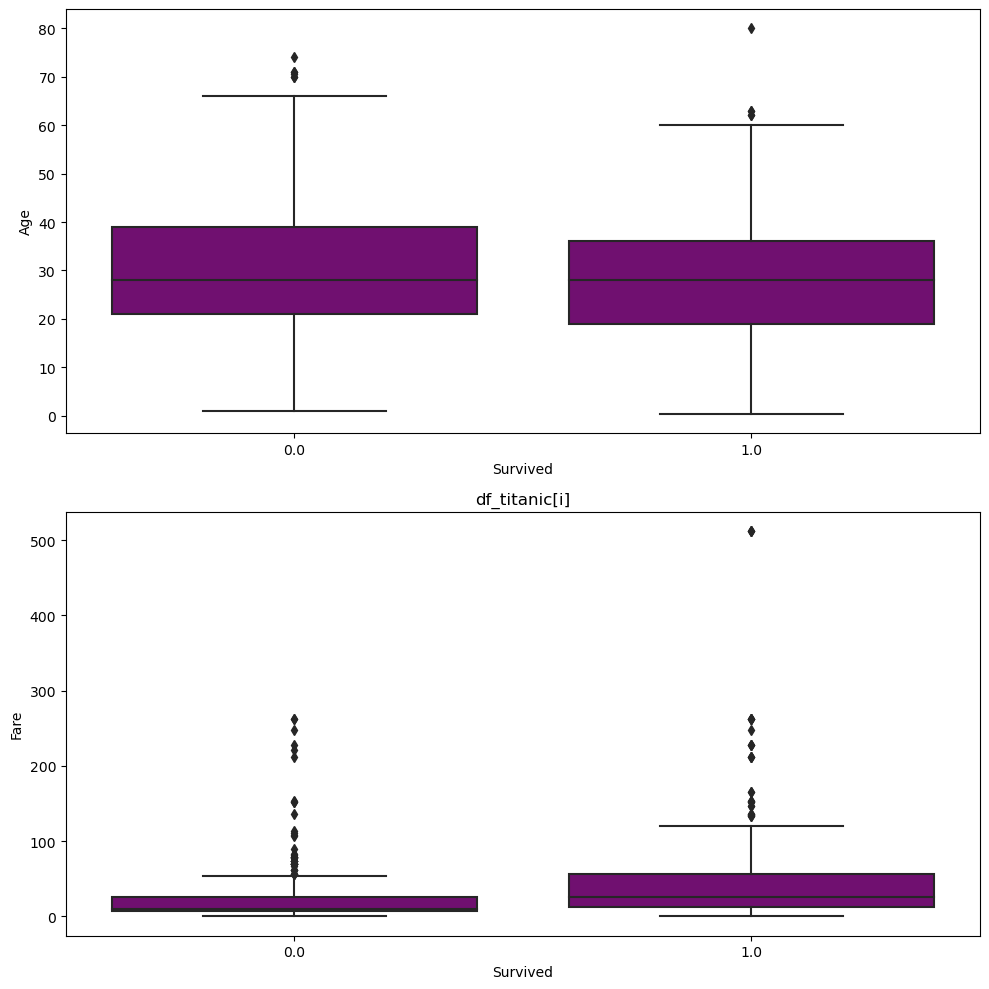

In [142]:
fig, ax= plt.subplots(2,1, figsize=(10,10))

for i, subplot in zip(num_cols, ax.flatten()):
    sns.boxplot(y=df_titanic[i],x=df_titanic['Survived'], ax=subplot,color='purple')
    plt.title('df_titanic[i]')

plt.tight_layout()
plt.show()

## Let's do some statistics

## Fare Vs Survival:

In [143]:
df_titanic.groupby("Survived")["Fare"].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1.0,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


### Inference:

* People who paid more are the people who are survived at high.
* 50 % of people paid who paid 26 pounds survived.
* As maximum number of people are not survived.

## Pclass Vs Survival:

In [144]:
df_titanic.groupby("Survived")["Pclass"].value_counts()

Survived  Pclass
0.0       3         372
          2          97
          1          80
1.0       1         136
          3         119
          2          87
Name: count, dtype: int64

In [145]:
df_titanic.groupby("Survived")["Pclass"].value_counts(normalize=True)*100

Survived  Pclass
0.0       3         67.759563
          2         17.668488
          1         14.571949
1.0       1         39.766082
          3         34.795322
          2         25.438596
Name: proportion, dtype: float64

In [146]:
df_titanic.groupby("Survived")[["Pclass","Sex"]].value_counts(normalize=True)*100

Survived  Pclass  Sex   
0.0       3       male      54.644809
          2       male      16.575592
          1       male      14.025501
          3       female    13.114754
          2       female     1.092896
          1       female     0.546448
1.0       1       female    26.608187
          3       female    21.052632
          2       female    20.467836
          3       male      13.742690
          1       male      13.157895
          2       male       4.970760
Name: proportion, dtype: float64

### Analysis:

* From the proportion we can say that  maximum number of 3rd class people are nor survived.
* And also high number of people survived from 1st class.

In [147]:
pd.crosstab(df_titanic["Pclass"],df_titanic["Survived"])

Survived,0.0,1.0
Pclass,,
1,80,136
2,97,87
3,372,119


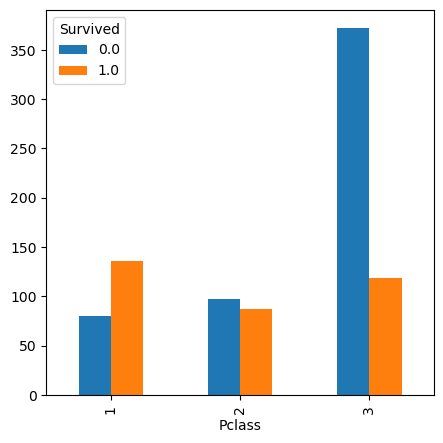

In [148]:
plt.rcParams["figure.figsize"]=[5,5]
pd.crosstab(index=df_titanic["Pclass"],columns=df_titanic["Survived"]).plot(kind="bar")
plt.show()

#### Analysis:

* People from 3rd class are highly not survived.

## Embarked Vs Survival:

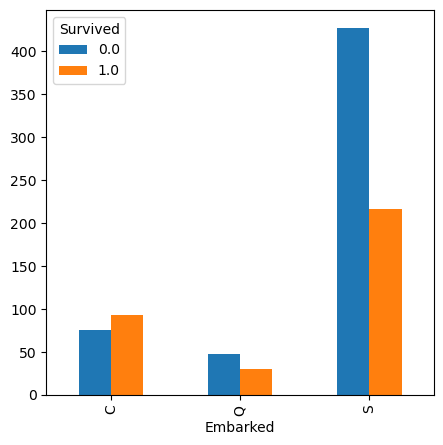

In [149]:
plt.rcParams["figure.figsize"]=[5,5]
pd.crosstab(index=df_titanic["Embarked"],columns=df_titanic["Survived"]).plot(kind="bar")
plt.show()

#### Analysis:

* As most of the people embarked from Southempton.
* Least number of people from Queenstown.

In [150]:
pd.crosstab(df_titanic["Embarked"],df_titanic["Survived"])

Survived,0.0,1.0
Embarked,,
C,75,93
Q,47,30
S,427,217


* From the Cheomburg there is a irregular pattern in survival.

## Sex Vs Survival:

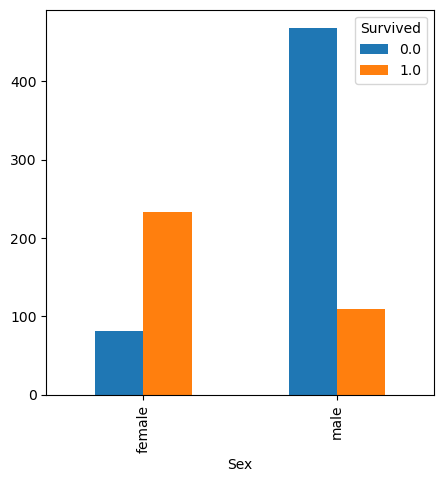

In [151]:
plt.rcParams["figure.figsize"]=[5,5]
pd.crosstab(index=df_titanic["Sex"],columns=df_titanic["Survived"]).plot(kind="bar")
plt.show()

### Analysis:

* Females have high chance of survival compared to males.


## Use Plotly to visulaize Histogram with respect to Categorical variable:

In [152]:
import plotly.express as px

In [153]:
px.histogram(df_titanic,x="Age",color="Embarked")

## Categorical Vs Categorical:

In [154]:
cats=["Embarked","Pclass","SibSp","Parch","Sex"]

<Figure size 300x300 with 0 Axes>

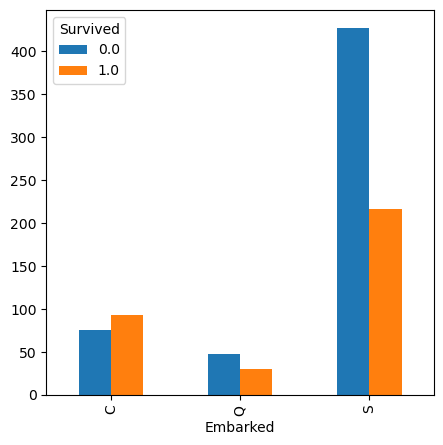

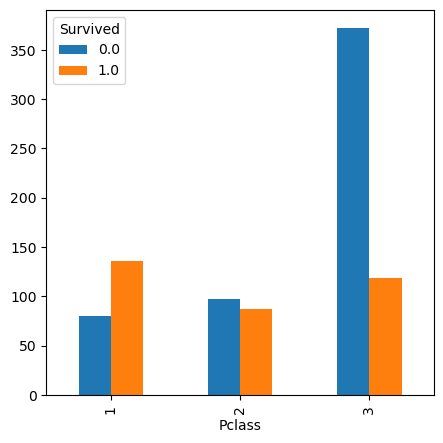

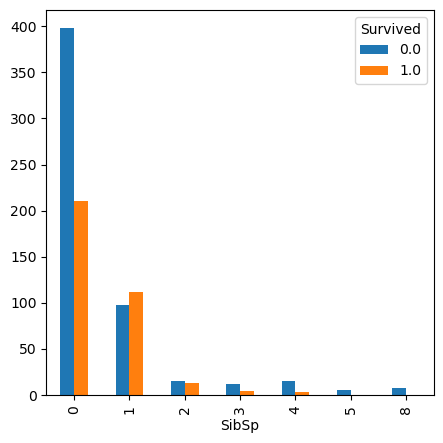

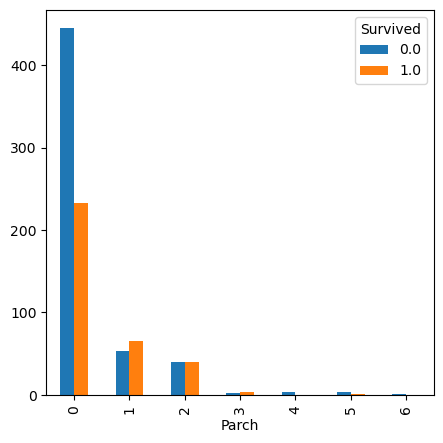

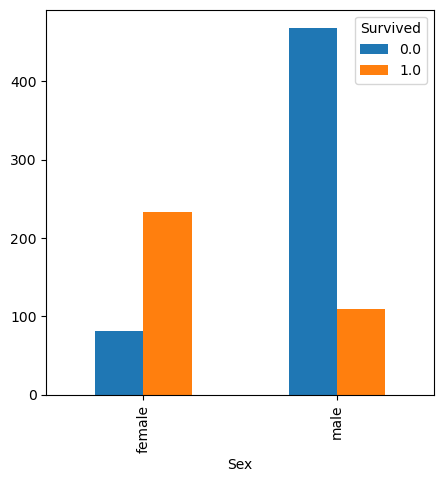

In [155]:
plt.figure(figsize=(3,3))

for i in cats:
  
    pd.crosstab(df_titanic[i],df_titanic["Survived"]).plot(kind="bar")
    
plt.show()    

### Doing crosstab function:

In [156]:
pd.crosstab(index=df_titanic["Pclass"],
           columns=df_titanic["Sex"],
           values=df_titanic["Fare"],
           aggfunc=np.mean)

Sex,female,male
Pclass,,
1,109.412385,69.888385
2,23.234827,19.904946
3,15.324250,12.415462


* Females are charged more compared to male.

In [157]:
df_titanic.pivot_table(values="Fare",
                      index="Embarked",
                      columns="Sex",
                      aggfunc=np.mean)

Sex,female,male
Embarked,,
C,81.128540,48.810619
Q,12.550837,12.273941
S,39.339305,21.841878


* Maximum number of higher class people are from Cheomburg.

In [158]:
df_titanic.groupby(["Embarked","Sex"])["Fare"].mean()

Embarked  Sex   
C         female    81.128540
          male      48.810619
Q         female    12.550837
          male      12.273941
S         female    39.339305
          male      21.841878
Name: Fare, dtype: float64

In [159]:
df_titanic.groupby(["Embarked","Sex","Pclass"])["Fare"].mean()

Embarked  Sex     Pclass
C         female  1         118.895949
                  2          27.003791
                  3          13.834545
          male    1          94.622560
                  2          20.904406
                  3           9.775901
Q         female  1          90.000000
                  2          12.350000
                  3           9.791968
          male    1          90.000000
                  2          11.489160
                  3          10.979167
S         female  1         101.069145
                  2          23.023118
                  3          18.083851
          male    1          53.670756
                  2          20.073322
                  3          13.145977
Name: Fare, dtype: float64

## Facetgrid Analysis:

* Facetgrid -- > Four variables together and make th analysis (two categorical and two numerical)

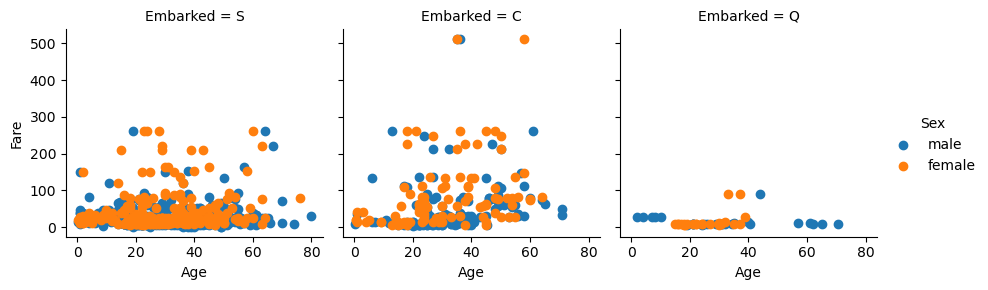

In [160]:
titanicplot=sns.FacetGrid(df_titanic,col="Embarked",hue="Sex")
titanicplot.map(plt.scatter,"Age","Fare").add_legend()
plt.show()

### Analysis:

* Most number of people who are paying are embarked from Cheomburg.
* Females are more compared to male passengers.


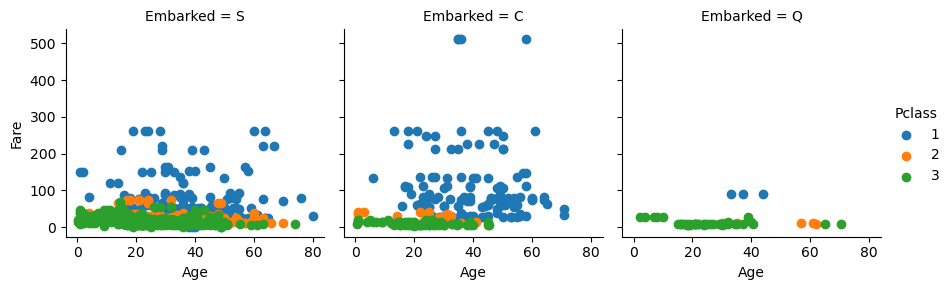

In [161]:
titanicplot=sns.FacetGrid(df_titanic,col="Embarked",hue="Pclass")
titanicplot.map(plt.scatter,"Age","Fare").add_legend()
plt.show()

### Analysis:

* People from 1st class are more.
* In Queenstown very less number of people embarked.

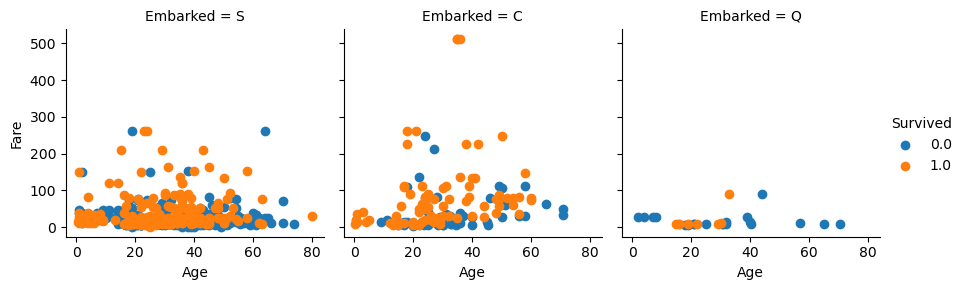

In [162]:
titanicplot=sns.FacetGrid(df_titanic,col="Embarked",hue="Survived")
titanicplot.map(plt.scatter,"Age","Fare").add_legend()
plt.show()

### Analysis:

* Less number of people from Queenstown survival rate.
* More number of people survived from Southempton.

## Checking for Missing values:

In [163]:
df_titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## Automated EDA:

In [164]:
#pip install fancyimpute

In [165]:
df_titanic.groupby("Sex")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,388.0,28.687088,14.576962,0.17,19.0,27.0,38.0,76.0
male,658.0,30.585228,14.280581,0.33,21.0,28.0,39.0,80.0


One way is to look at the median age and replace wherever you have male with median age and female with their median age.

In [166]:
from fancyimpute import KNN,IterativeImputer
from sklearn.preprocessing import StandardScaler

In [167]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    object 
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [168]:
num_cols=df_titanic.select_dtypes(np.number)
num_cols=num_cols[["Age","Fare"]]

In [169]:
sc=StandardScaler()
df_num_sc=pd.DataFrame(sc.fit_transform(num_cols),columns=num_cols.columns)
df_num_sc.head()

,Age,Fare
0,-0.547050,-0.503402
1,0.563552,0.734222
2,-0.269400,-0.490356
3,0.355314,0.382778
4,0.355314,-0.487940


In [170]:
df_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1046 non-null   float64
 1   Fare    1308 non-null   float64
dtypes: float64(2)
memory usage: 20.6 KB


## Treating those missing values:

In [171]:
from sklearn.impute import KNNImputer

In [172]:
imputer=KNNImputer(n_neighbors=5)

df_num_sc["Age"]=imputer.fit_transform(pd.DataFrame(df_num_sc["Age"]))
df_num_sc["Fare"]=imputer.fit_transform(pd.DataFrame(df_num_sc["Fare"]))

In [173]:
df_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1309 non-null   float64
 1   Fare    1309 non-null   float64
dtypes: float64(2)
memory usage: 20.6 KB


## Using Inverse transform method:

* As scaled data will not be helpful for Univariate,Bivariate or Multivariate analysis.

In [174]:
df_num=pd.DataFrame(sc.inverse_transform(df_num_sc),columns=df_num_sc.columns)
df_num.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


* We are leaving out fare and age as these ar continous variable.

## Categorical columns:

In [175]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [176]:
df_others=df_titanic[["PassengerId","Survived",'Pclass', 'Name', 'Sex', 'SibSp',
       'Parch', 'Ticket','Cabin', 'Embarked']]

In [177]:
df_titanic=pd.concat([df_num,df_others],axis=1)

In [178]:
df_titanic.isnull().sum()

Age               0
Fare              0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
Cabin          1014
Embarked          2
dtype: int64

In [179]:
from sklearn.impute import SimpleImputer

In [180]:
df_titanic["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [181]:
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df_titanic["Embarked"]=pd.DataFrame(imp.fit_transform(pd.DataFrame(df_titanic["Embarked"])))

In [182]:
df_titanic.isnull().sum()

Age               0
Fare              0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
Cabin          1014
Embarked          0
dtype: int64

In [183]:
df_titanic.columns

Index(['Age', 'Fare', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex',
       'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'],
      dtype='object')

In [184]:
df_titanic.groupby("Pclass")["Cabin"].describe()

,count,unique,top,freq
Pclass,,,,
1,256,168,C23 C25 C27,6
2,23,9,F33,4
3,16,9,G6,5


* Most cabins were given to 1st class people.

In [185]:
pd.set_option("display.max_columns",150)

In [186]:
pd.crosstab(df_titanic["Pclass"],df_titanic["Cabin"])

Cabin,A10,A11,A14,A16,A18,A19,A20,A21,A23,A24,A26,A29,A31,A32,A34,A36,A5,A6,A7,A9,B10,B101,B102,B11,B18,B19,B20,B22,B24,B26,B28,B3,B30,B35,B36,B37,B38,B39,B4,B41,B42,B45,B49,B5,B50,B51 B53 B55,B52 B54 B56,B57 B59 B63 B66,B58 B60,B61,B69,B71,B73,B77,B78,B79,B80,B82 B84,B86,B94,B96 B98,C101,C103,C104,C105,C106,C110,C111,C116,C118,C123,C124,C125,C126,C128,...,C91,C92,C93,C95,C97,C99,D,D10 D12,D11,D15,D17,D19,D20,D21,D22,D26,D28,D30,D33,D34,D35,D36,D37,D38,D40,D43,D45,D46,D47,D48,D49,D50,D56,D6,D7,D9,E10,E101,E12,E121,E17,E24,E25,E31,E33,E34,E36,E38,E39 E41,E40,E44,E45,E46,E49,E50,E52,E58,E60,E63,E67,E68,E77,E8,F,F E46,F E57,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
Pclass,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1,1,1,2,1,2,2,1,1,2,1,1,2,1,1,1,1,1,2,1,2,2,2,1,3,1,5,3,1,2,2,1,2,2,1,1,1,1,1,4,3,1,1,1,2,1,1,2,1,2,2,2,2,1,...,1,2,2,1,1,1,0,2,1,2,2,2,2,2,1,2,2,2,2,1,2,2,2,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,0,1,2,2,2,2,3,1,1,1,1,2,1,2,1,2,1,1,1,1,2,1,0,2,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,4,4,0,4,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,0,0,1,0,5,0


* From the crosstab we can see that A to C series cabin  might be belong to 1st class people.
* But the series is getting broken at some cases and it is not usefull for analysisation.

In [187]:
df_titanic.drop("Cabin",axis=1,inplace=True)

In [188]:
df_titanic.groupby("Pclass")["Ticket"].describe()

,count,unique,top,freq
Pclass,,,,
1,323,188,PC 17608,7
2,277,192,S.O.C. 14879,7
3,709,549,CA. 2343,11


In [189]:
df_g1=df_titanic.groupby("Pclass")

In [190]:
df_pclass1=df_g1.get_group(1)

In [191]:

df_g1.get_group(1).describe() # it is filtering the 1st class from Pclass and doing 5 point summary

,Age,Fare,PassengerId,Pclass,SibSp,Parch
count,323.000000,323.000000,323.00000,323.0,323.000000,323.000000
mean,38.039580,87.508992,672.49226,1.0,0.436533,0.365325
std,13.970676,80.447178,368.72570,0.0,0.609064,0.715602
min,0.920000,0.000000,2.00000,1.0,0.000000,0.000000
25%,29.881138,30.695800,347.00000,1.0,0.000000,0.000000
50%,36.000000,60.000000,670.00000,1.0,0.000000,0.000000
75%,48.000000,107.662500,973.50000,1.0,1.000000,0.500000
max,80.000000,512.329200,1306.00000,1.0,3.000000,4.000000


In [192]:
df_pclass2=df_g1.get_group(2)

In [193]:
df_g1.get_group(2).describe()

,Age,Fare,PassengerId,Pclass,SibSp,Parch
count,277.000000,277.000000,277.000000,277.0,277.000000,277.000000
mean,29.528333,21.179196,671.566787,2.0,0.393502,0.368231
std,13.237693,13.607122,383.707495,0.0,0.590100,0.692717
min,0.670000,0.000000,10.000000,2.0,0.000000,0.000000
25%,23.000000,13.000000,341.000000,2.0,0.000000,0.000000
50%,29.000000,15.045800,671.000000,2.0,0.000000,0.000000
75%,36.000000,26.000000,1035.000000,2.0,1.000000,1.000000
max,70.000000,73.500000,1298.000000,2.0,3.000000,3.000000


In [194]:
df_pclass3=df_g1.get_group(3)

In [195]:
df_g1.get_group(3).describe()

,Age,Fare,PassengerId,Pclass,SibSp,Parch
count,709.000000,709.000000,709.000000,709.0,709.000000,709.000000
mean,26.302224,13.331087,640.558533,3.0,0.568406,0.400564
std,10.310818,11.510752,379.887782,0.0,1.299681,0.981639
min,0.170000,0.000000,1.000000,3.0,0.000000,0.000000
25%,21.000000,7.750000,302.000000,3.0,0.000000,0.000000
50%,29.881138,8.050000,644.000000,3.0,0.000000,0.000000
75%,29.881138,15.245800,971.000000,3.0,1.000000,0.000000
max,74.000000,69.550000,1309.000000,3.0,8.000000,9.000000


In [196]:
 df_pclass3["Ticket"]

0                A/5 21171
2         STON/O2. 3101282
4                   373450
5                   330877
7                   349909
               ...        
1303                347086
1304             A.5. 3236
1306    SOTON/O.Q. 3101262
1307                359309
1308                  2668
Name: Ticket, Length: 709, dtype: object

## Doing Feature Engineering on Age:

In [197]:
plt.rcParams["figure.figsize"]=8,5

<Axes: >

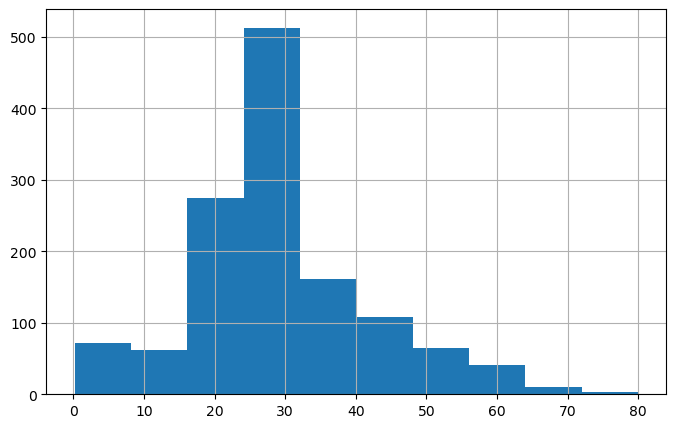

In [198]:
df_titanic["Age"].hist()

In [199]:
bins=[0,15,20,35,55,85]
labels=["Young","Teenager","Adults-Young","Adults-Middle","Adults-Old"]
df_titanic["Age_Group"]=pd.cut(df_titanic["Age"],bins=bins,labels=labels,include_lowest=True) #include-lowest means including the young also
df_titanic.head()

,Age,Fare,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Age_Group
0,22.0,7.2500,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,S,Adults-Young
1,38.0,71.2833,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C,Adults-Middle
2,26.0,7.9250,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,S,Adults-Young
3,35.0,53.1000,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,S,Adults-Young
4,35.0,8.0500,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,S,Adults-Young


## Doing Facetgrid on Age-group to get a clear pattern:

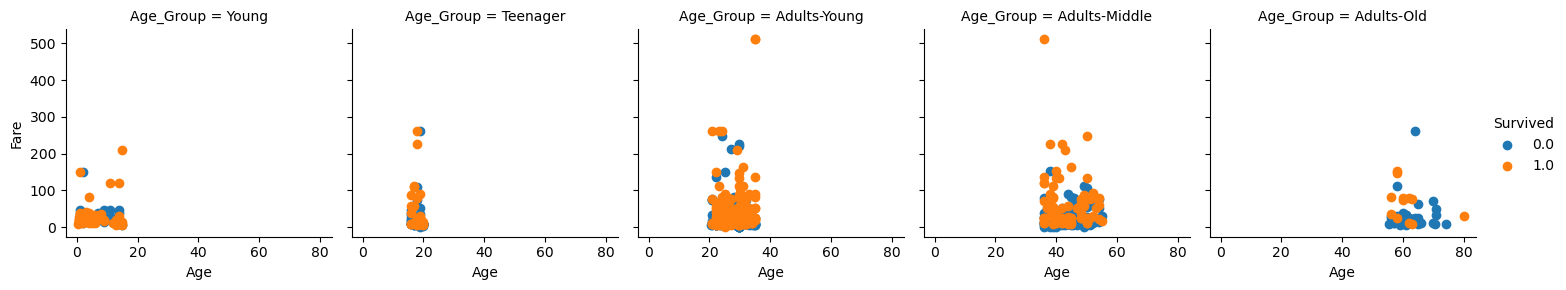

In [200]:
titanicplot=sns.FacetGrid(df_titanic,col="Age_Group",hue="Survived")
titanicplot.map(plt.scatter,"Age","Fare").add_legend()
plt.show()

### Analysis:

* From the plot we can see that Adults-Young and Adults-Middle have survived more.

## Analysis in Age-Group,Survived and Sex:

In [201]:
plt.rcParams["figure.figsize"]=5,5

<Axes: xlabel='Survived'>

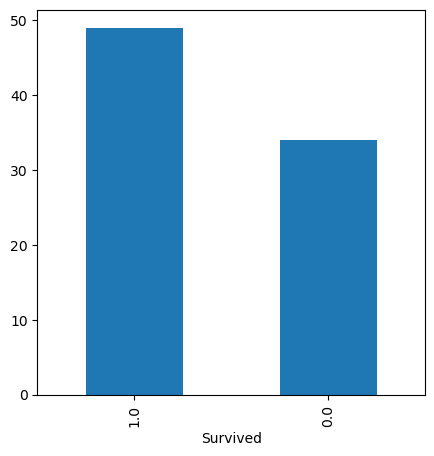

In [202]:
df_AG=df_titanic.groupby("Age_Group")
df_AG.get_group("Young")["Survived"].value_counts().plot(kind="bar")

<Axes: xlabel='Survived,Sex'>

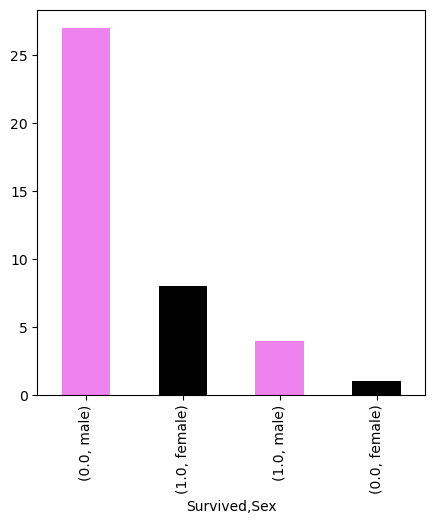

In [203]:
df_AG.get_group("Adults-Old")[["Survived","Sex"]].value_counts().plot(kind="bar",color=["violet","black"])

### Analysis:

* Number of deaths are more in Male compared to female.
* Very least number of females are not survived.

## Automated EDA: (Pandas Profiling)

In [204]:
#!pip install ydata-profiling

In [206]:
#from ydata_profiling import ProfileReport

In [207]:
#profile=ProfileReport(df_titanic)
#profile

In [208]:
#pip install AutoViz

In [209]:
df_titanic.to_csv("titanic_viz.csv")

In [210]:
#from autoviz.AutoViz_Class import AutoViz_Class
#AV=AutoViz_Class()

In [211]:
#AV.AutoViz("titanic_viz.csv")

## Dropping the columns:

In [212]:
df_titanic.columns

Index(['Age', 'Fare', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex',
       'SibSp', 'Parch', 'Ticket', 'Embarked', 'Age_Group'],
      dtype='object')

In [213]:
df_titanicNew=df_titanic.drop(["PassengerId","Name","Ticket"],axis=1)

In [214]:
df_titanicNew.head()

,Age,Fare,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_Group
0,22.0,7.2500,0.0,3,male,1,0,S,Adults-Young
1,38.0,71.2833,1.0,1,female,1,0,C,Adults-Middle
2,26.0,7.9250,1.0,3,female,0,0,S,Adults-Young
3,35.0,53.1000,1.0,1,female,1,0,S,Adults-Young
4,35.0,8.0500,0.0,3,male,0,0,S,Adults-Young


## Split the Data in the same proportion as the Original Data:

In [215]:
print("Training Data",train.shape)
print("Testing Data",test.shape)

Training Data (891, 12)
Testing Data (418, 11)


Pull the data upto 891 records. The number of columns have changed.

In [216]:
df_train=df_titanicNew.iloc[0:train.shape[0],]
df_train.shape

(891, 9)

In [217]:
df_train.head()

,Age,Fare,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_Group
0,22.0,7.2500,0.0,3,male,1,0,S,Adults-Young
1,38.0,71.2833,1.0,1,female,1,0,C,Adults-Middle
2,26.0,7.9250,1.0,3,female,0,0,S,Adults-Young
3,35.0,53.1000,1.0,1,female,1,0,S,Adults-Young
4,35.0,8.0500,0.0,3,male,0,0,S,Adults-Young


In [218]:
df_test=df_titanicNew.iloc[train.shape[0]:,]
df_test.shape

(418, 9)

In [219]:
df_test.drop("Survived",axis=1,inplace=True)

In [220]:
df_test.shape

(418, 8)

In [221]:
df_train.dtypes

Age           float64
Fare          float64
Survived       object
Pclass          int64
Sex            object
SibSp           int64
Parch           int64
Embarked       object
Age_Group    category
dtype: object

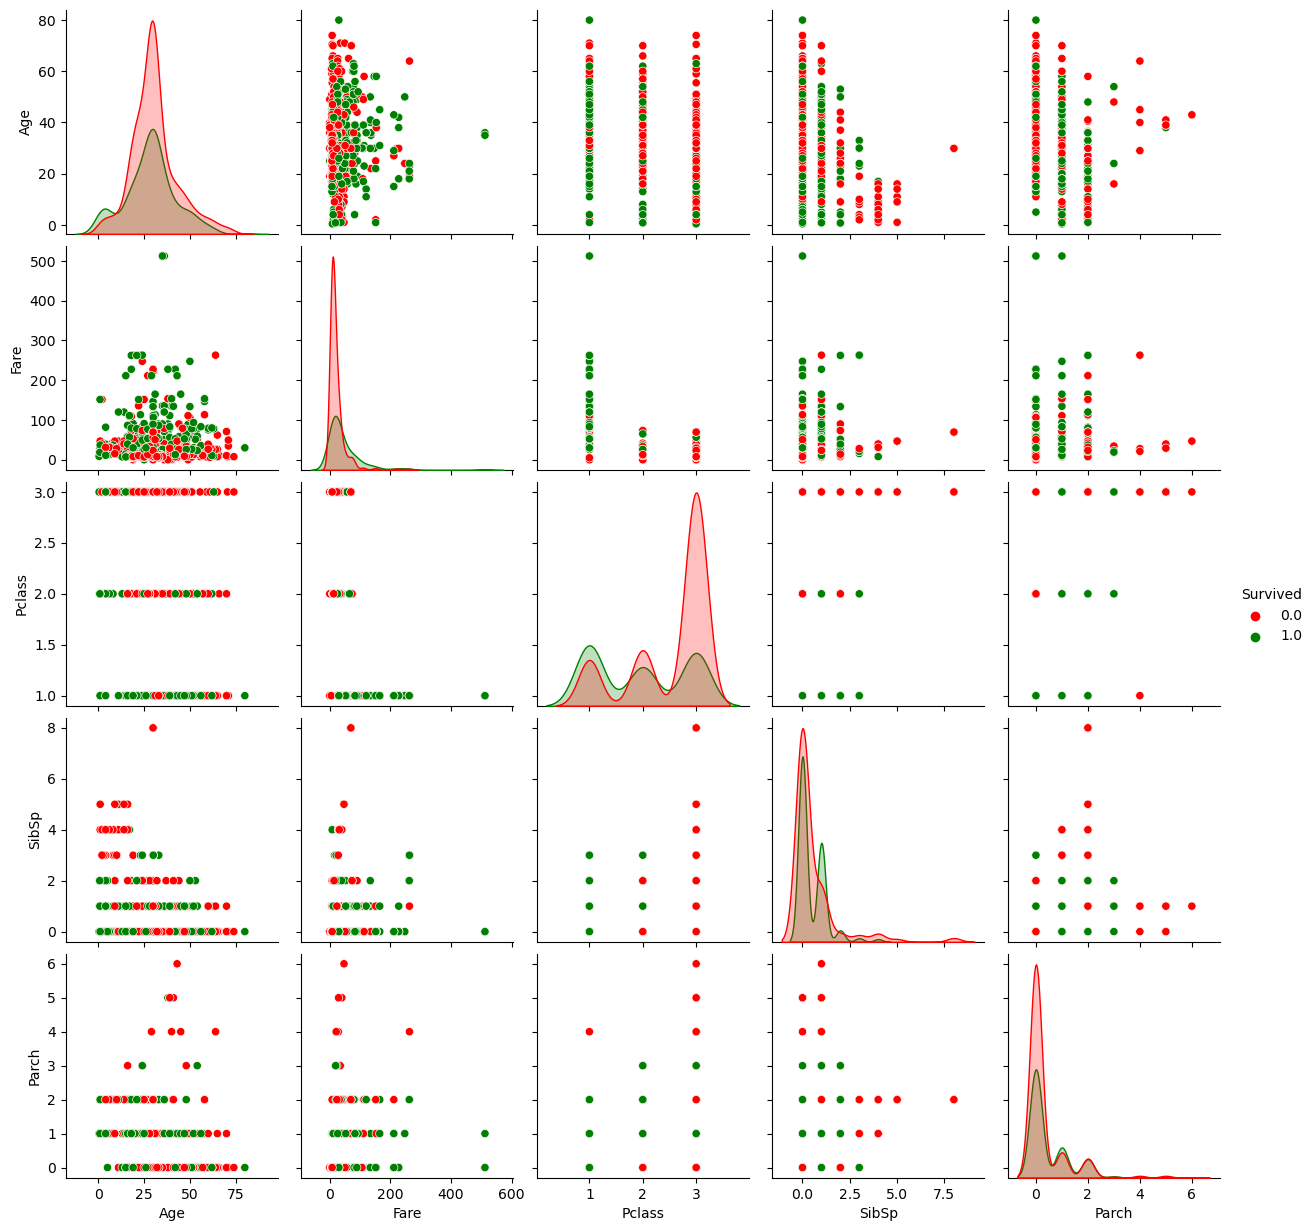

In [225]:
sns.pairplot(df_train,vars=['Age', 'Fare', 'Pclass', 'SibSp', 'Parch'],hue="Survived",palette=["Red","Green"])
plt.show();

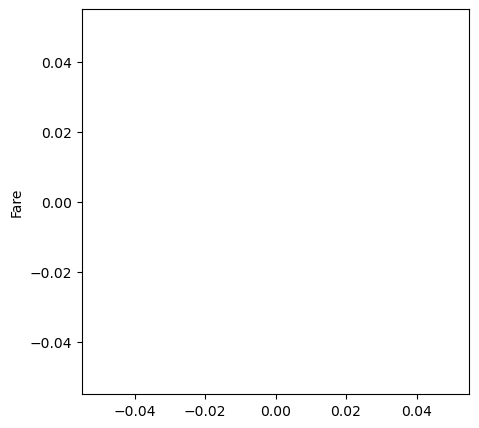

In [223]:
sns.scatterplot(df_train['Age'],y=df_train['Fare']);


In [224]:
df_train_num=df_train.select_dtypes(np.number)
df_train_num.columns

Index(['Age', 'Fare', 'Pclass', 'SibSp', 'Parch'], dtype='object')

## Statistical test:

In [228]:
import scipy.stats as st

In [229]:
cor_test=["Age","Fare"]

for i in cor_test:
    teststats,pvalue=st.pearsonr(df_train[i],df_train["Survived"].astype(int))
    print("P value is ",pvalue)

P value is  0.035838299871154985
P value is  6.120189341924538e-15


## Chi-Square Test

### H0: no association between categorical variables


### H1: there is association between categorical variable

In [230]:
st.chi2_contingency(pd.crosstab(df_train["Pclass"],df_train["Survived"]))

Chi2ContingencyResult(statistic=102.88898875696056, pvalue=4.549251711298793e-23, dof=2, expected_freq=array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]]))

In [231]:
chi_test=["Pclass","Sex","SibSp","Parch","Embarked","Age_Group"]

for i in chi_test:
    teststats,pvalue,dof,expected_freq=st.chi2_contingency(pd.crosstab(df_train[i],df_train["Survived"]))
    print("Pvalue is ",pvalue)

Pvalue is  4.549251711298793e-23
Pvalue is  1.1973570627755645e-58
Pvalue is  1.5585810465902147e-06
Pvalue is  9.703526421039997e-05
Pvalue is  2.3008626481449577e-06
Pvalue is  0.0009955378235861937


* The above P values are important.

# Model Building:

In [232]:
from sklearn.model_selection import StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

from sklearn.neural_network import MLPClassifier

In [233]:
df_train["Survived"]=df_train["Survived"].astype(int)

In [234]:
X=df_train.drop("Survived",axis=1)
y=df_train["Survived"]

In [235]:
X.head()

,Age,Fare,Pclass,Sex,SibSp,Parch,Embarked,Age_Group
0,22.0,7.2500,3,male,1,0,S,Adults-Young
1,38.0,71.2833,1,female,1,0,C,Adults-Middle
2,26.0,7.9250,3,female,0,0,S,Adults-Young
3,35.0,53.1000,1,female,1,0,S,Adults-Young
4,35.0,8.0500,3,male,0,0,S,Adults-Young


In [237]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int32

## Neural Network:

In [236]:
from sklearn.preprocessing import StandardScaler

In [238]:
X.dtypes

Age           float64
Fare          float64
Pclass          int64
Sex            object
SibSp           int64
Parch           int64
Embarked       object
Age_Group    category
dtype: object

## Train Data:

## Bifurcating the Numerical and Categorical Data for Train Dataset:

In [ ]:
#

In [239]:
num_data=X[["Age","Fare"]]
cat_data=X[["Pclass","Sex","SibSp","Parch","Embarked","Age_Group"]]

## Scaling the Numrical Data for Train Dataset:

In [ ]:
##  Why we are using scaling--To get GD in optimal value so that it will work fast
## Linear Regression - Has higher explantory power
## Blackbox-- Neural networks becouse when we give data inside this we don't know what is going on inside so it is called black box

In [240]:
ss=StandardScaler()
# We are scaling the data for ANN(Artificial Neural Network) without scaling it will give very poor results.

num_scaled=ss.fit_transform(num_data)
num_scaled=pd.DataFrame(num_scaled,columns=num_data.columns)

In [241]:
num_scaled.head()

,Age,Fare
0,-0.595254,-0.502445
1,0.635996,0.786845
2,-0.287441,-0.488854
3,0.405137,0.420730
4,0.405137,-0.486337


## Encoding for Train Dataset:

* We are doing dummy encoding because we don't know the order of the categories.

In [242]:
cat_dummy=pd.get_dummies(cat_data,drop_first=True).astype(int)
cat_dummy.head()

,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Age_Group_Teenager,Age_Group_Adults-Young,Age_Group_Adults-Middle,Age_Group_Adults-Old
0,3,1,0,1,0,1,0,1,0,0
1,1,1,0,0,0,0,0,0,1,0
2,3,0,0,0,0,1,0,1,0,0
3,1,1,0,0,0,1,0,1,0,0
4,3,0,0,1,0,1,0,1,0,0


## Concatenating Data(Numerical and Categorical)  for train dataset:

In [243]:
X_scaled=pd.concat([num_scaled,cat_dummy],axis=1)
X_scaled.head()

,Age,Fare,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Age_Group_Teenager,Age_Group_Adults-Young,Age_Group_Adults-Middle,Age_Group_Adults-Old
0,-0.595254,-0.502445,3,1,0,1,0,1,0,1,0,0
1,0.635996,0.786845,1,1,0,0,0,0,0,0,1,0
2,-0.287441,-0.488854,3,0,0,0,0,1,0,1,0,0
3,0.405137,0.420730,1,1,0,0,0,1,0,1,0,0
4,0.405137,-0.486337,3,0,0,1,0,1,0,1,0,0


## Test Data:

In [244]:
num_data_test=df_test[["Age","Fare"]]
cat_data_test=df_test[["Pclass","Sex","SibSp","Parch","Embarked","Age_Group"]]

In [245]:
num_data_test.shape

(418, 2)

## Scaling the numerical data on test data:

In [246]:
num_scaled_test=ss.transform(num_data_test)
num_scaled_test=pd.DataFrame(num_scaled_test,columns=num_data_test.columns)

In [247]:
num_scaled_test

,Age,Fare
0,0.366660,-0.490783
1,1.328575,-0.507479
2,2.482872,-0.453367
3,-0.210488,-0.474005
4,-0.595254,-0.401017
...,...,...
413,0.011224,-0.486337
414,0.712950,1.544246
415,0.674473,-0.502445
416,0.011224,-0.486337


## Encoding for Test Dataset:

In [248]:
cat_dummy_test=pd.get_dummies(cat_data_test,drop_first=True).astype(int)
cat_dummy_test.head()

,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Age_Group_Teenager,Age_Group_Adults-Young,Age_Group_Adults-Middle,Age_Group_Adults-Old
891,3,0,0,1,1,0,0,1,0,0
892,3,1,0,0,0,1,0,0,1,0
893,2,0,0,1,1,0,0,0,0,1
894,3,0,0,1,0,1,0,1,0,0
895,3,1,1,0,0,1,0,1,0,0


In [249]:
cat_dummy_test.reset_index(inplace=True,drop=True)

In [250]:
cat_dummy_test.head()

,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Age_Group_Teenager,Age_Group_Adults-Young,Age_Group_Adults-Middle,Age_Group_Adults-Old
0,3,0,0,1,1,0,0,1,0,0
1,3,1,0,0,0,1,0,0,1,0
2,2,0,0,1,1,0,0,0,0,1
3,3,0,0,1,0,1,0,1,0,0
4,3,1,1,0,0,1,0,1,0,0


## Concatenating Data(Numerical and Categorical) for test dataset:

In [252]:
df_test_scaled=pd.concat([num_scaled_test,cat_dummy_test],axis=1)
df_test_scaled.head()

,Age,Fare,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Age_Group_Teenager,Age_Group_Adults-Young,Age_Group_Adults-Middle,Age_Group_Adults-Old
0,0.366660,-0.490783,3,0,0,1,1,0,0,1,0,0
1,1.328575,-0.507479,3,1,0,0,0,1,0,0,1,0
2,2.482872,-0.453367,2,0,0,1,1,0,0,0,0,1
3,-0.210488,-0.474005,3,0,0,1,0,1,0,1,0,0
4,-0.595254,-0.401017,3,1,1,0,0,1,0,1,0,0


## Encoding for Non scaled data:

In [256]:
X=pd.get_dummies(X,drop_first=True).astype(int)
X.shape

(891, 12)

In [257]:
X.head()

,Age,Fare,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Age_Group_Teenager,Age_Group_Adults-Young,Age_Group_Adults-Middle,Age_Group_Adults-Old
0,22,7,3,1,0,1,0,1,0,1,0,0
1,38,71,1,1,0,0,0,0,0,0,1,0
2,26,7,3,0,0,0,0,1,0,1,0,0
3,35,53,1,1,0,0,0,1,0,1,0,0
4,35,8,3,0,0,1,0,1,0,1,0,0


* We also need to encode the test data.

## Encoding for test data:

In [255]:
df_test=pd.get_dummies(df_test,drop_first=True).astype(int)
df_test.shape

(418, 12)

In [258]:
df_test.head()

,Age,Fare,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Age_Group_Teenager,Age_Group_Adults-Young,Age_Group_Adults-Middle,Age_Group_Adults-Old
891,34,7,3,0,0,1,1,0,0,1,0,0
892,47,6,3,1,0,0,0,1,0,0,1,0
893,62,9,2,0,0,1,1,0,0,0,0,1
894,27,8,3,0,0,1,0,1,0,1,0,0
895,22,12,3,1,1,0,0,1,0,1,0,0


## KFold Mechanism:

In [259]:
kfold=StratifiedKFold(n_splits=5,
                     shuffle=True,
                     random_state=0)

* To reduce variance.
* It will check datapoints(will be retrieved from index values) on training dataset.
* In the training dataset, we will feed into kfold cross validation method by which it will validating against each data.
* To solve the inherent problem in training data as not all the patterns are not picked up.

## Logistic Regression:

In [261]:
lgr=LogisticRegression()

In [262]:
y_pred=[]

for train_index,test_index in kfold.split(X,y):
    x_train=X.loc[train_index]
    y_train=y.loc[train_index]
    
    lgr.fit(x_train,y_train)
    y_pred.append(lgr.predict(df_test))

In [263]:
y_log=pd.DataFrame(y_pred).T.mode(axis=1)

## Basic Model:

In [264]:
model_prediction=pd.DataFrame({"PassengerId":test.PassengerId,
                              "Survived":test.Sex})
model_prediction

,PassengerId,Survived
0,892,male
1,893,female
2,894,male
3,895,male
4,896,female
...,...,...
413,1305,male
414,1306,female
415,1307,male
416,1308,male


In [ ]:
#model_prediction.to_csv("Basic.csv",index=False)

In [265]:
model_prediction["Survived"]=y_log

In [266]:
model_prediction.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [267]:
model_prediction.to_csv("LogisticReg.csv",index=False)

In [272]:
import os
os.getcwd()

'C:\\Users\\bagya'

## Decision Tree:

In [268]:
dt=DecisionTreeClassifier() 
y_pred=[]

for train_index,test_index in kfold.split(X,y):
    x_train=X.loc[train_index]
    y_train=y.loc[train_index]
    
    dt.fit(x_train,y_train)
    y_pred.append(dt.predict(df_test))

In [269]:
y_dt=pd.DataFrame(y_pred).T.mode(axis=1)

In [270]:
model_prediction["Survived"]=y_dt

In [271]:
model_prediction.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


In [273]:
model_prediction.to_csv("DecisiontreeReg.csv",index=False)

## Random Forest:

In [274]:
rf=RandomForestClassifier()
y_pred=[]

for train_index,test_index in kfold.split(X,y):
    x_train=X.loc[train_index]
    y_train=y.loc[train_index]
    
    rf.fit(x_train,y_train)
    y_pred.append(rf.predict(df_test))

In [275]:
y_rf=pd.DataFrame(y_pred).T.mode(axis=1)

In [276]:
model_prediction["Survived"]=y_rf

In [277]:
model_prediction.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [278]:
model_prediction.to_csv("RandomForestReg.csv",index=False)

## Ada Boost:

In [279]:
ada=AdaBoostClassifier()
y_pred=[]

for train_index,test_index in kfold.split(X,y):
    x_train=X.loc[train_index]
    y_train=y.loc[train_index]
    
    ada.fit(x_train,y_train)
    y_pred.append(ada.predict(df_test))

In [280]:
y_ada=pd.DataFrame(y_pred).T.mode(axis=1)

In [281]:
model_prediction["Survived"]=y_ada

In [282]:
model_prediction.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [283]:
model_prediction.to_csv("AdaboostingReg.csv",index=False)

## Gradient Boosting:

In [284]:
gb=GradientBoostingClassifier()
y_pred=[]

for train_index,test_index in kfold.split(X,y):
    x_train=X.loc[train_index]
    y_train=y.loc[train_index]
    
    gb.fit(x_train,y_train)
    y_pred.append(gb.predict(df_test))

In [285]:
y_gb=pd.DataFrame(y_pred).T.mode(axis=1)

In [286]:
model_prediction["Survived"]=y_gb

In [287]:
model_prediction.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [288]:
model_prediction.to_csv("GradientboostingReg.csv",index=False)

## Xtreme Gradint Boosting:

In [290]:
xgb=XGBClassifier()
y_pred=[]

for train_index,test_index in kfold.split(X,y):
    x_train=X.loc[train_index]
    y_train=y.loc[train_index]
    
    xgb.fit(x_train,y_train)
    y_pred.append(xgb.predict(df_test))

In [291]:
y_xgb=pd.DataFrame(y_pred).T.mode(axis=1)

In [292]:
model_prediction["Survived"]=y_xgb

In [293]:
model_prediction.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [294]:
model_prediction.to_csv("XtremeGradientboostingReg.csv",index=False)

## Neural Network:

In [295]:
from sklearn.neural_network import MLPClassifier # Multi layer Perceptron

### Revisiting the scaled data:

In [296]:
X_scaled.head()

,Age,Fare,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Age_Group_Teenager,Age_Group_Adults-Young,Age_Group_Adults-Middle,Age_Group_Adults-Old
0,-0.595254,-0.502445,3,1,0,1,0,1,0,1,0,0
1,0.635996,0.786845,1,1,0,0,0,0,0,0,1,0
2,-0.287441,-0.488854,3,0,0,0,0,1,0,1,0,0
3,0.405137,0.420730,1,1,0,0,0,1,0,1,0,0
4,0.405137,-0.486337,3,0,0,1,0,1,0,1,0,0


In [297]:
ANN=MLPClassifier()
y_pred=[]
for train_index,test_index in kfold.split(X,y):
    x_train=X_scaled.loc[train_index]
    y_train=y.loc[train_index]
    
    ANN.fit(x_train,y_train)
    y_pred.append(ANN.predict(df_test))

In [298]:
y_ann=pd.DataFrame(y_pred).T.mode(axis=1)

In [299]:
model_prediction["Survived"]=y_ann

In [300]:
model_prediction.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1


In [301]:
model_prediction.to_csv("NeuralNetworkReg.csv",index=False) 